GelecekHayalim_W_Code_2.0_VERİ_BİLİMİ_VE_YAPAY_ZEKA_Atölyesi_Proje

Gizem Üner - Hilal Zerk Demirkan - Nazlıcan Ezeroğlu - Nisa Kaşıkcı

# Hane Halkı Yenilenebilir Enerji Maliyet Tasarruflarının Belirleyicileri (2020–2024)

Bu çalışma, 2020–2024 döneminde küresel ölçekte hane halkı odaklı bir veri seti üzerinden yenilenebilir enerji kullanımını ve buna bağlı maliyet tasarruflarını incelemeyi amaçlamaktadır. Analiz, ülkeler ve bölgeler arası farklılıkları dikkate alarak sosyoekonomik ve mekânsal belirleyicilere odaklanmaktadır.


ÇALIŞMANIN KAPSAMI

-Farklı ülkeler ve bölgelerdeki yenilenebilir enerji kullanım eğilimlerini analiz etmek,

-Gelir düzeylerinin ve hane büyüklüğünün yenilenebilir enerji kullanımına etkisini anlamak,

-Kentsel ve kırsal alanlar arasındaki enerji kullanımı ilişkisini karşılaştırmak,

-Yenilenebilir enerji kullanımını teşvik etmede devlet desteğinin rolünü araştırmak.

VERİ SETİNİN YÜKLENMESİ

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
data = pd.read_csv("/Users/hilalzerkdemirkan/Downloads/Renewable_Energy_Usage_Sampled.csv")

In [16]:
data.shape

(1000, 12)

In [26]:
data.columns

Index(['Region', 'Country', 'Energy_Source', 'Monthly_Usage_kWh', 'Year',
       'Household_Size', 'Income_Level', 'Urban_Rural', 'Adoption_Year',
       'Subsidy_Received', 'Cost_Savings_USD', 'Monthly_Usage_kWh_by_Person',
       'Cost_Savings_USD_by_Person'],
      dtype='object')

In [17]:
data.head()

,Household_ID,Region,Country,Energy_Source,Monthly_Usage_kWh,Year,Household_Size,Income_Level,Urban_Rural,Adoption_Year,Subsidy_Received,Cost_Savings_USD
0,H01502,North America,USA,Hydro,1043.49,2024,5,Low,Urban,2012,No,10.46
1,H02587,Australia,Australia,Geothermal,610.01,2024,4,High,Rural,2023,No,43.49
2,H02654,North America,USA,Biomass,1196.75,2024,8,Low,Rural,2017,Yes,93.28
3,H01056,South America,Colombia,Biomass,629.67,2024,7,High,Urban,2023,No,472.85
4,H00706,Africa,Egypt,Hydro,274.46,2022,7,Middle,Rural,2010,No,65.98


Özellikler:

Household_ID: Her hanehalkı için bir tanımlayıcı

Region: Hanehalkının bulunduğu coğrafi bölge (örneğin, Kuzey Amerika, Avrupa, Asya)

Country: Hanehalkının bulunduğu ülke

Energy_Source: Hanehalkı tarafından kullanılan yenilenebilir enerji türü (örneğin, Güneş, Rüzgar, Hidroelektrik)

Monthly_Usage_kWh: Aylık enerji tüketimi (kilowatt saat cinsinden)

Year: Verilerin kaydedildiği yıl (2020-2024)

Household_Size: Hanehalkında yaşayan kişi sayısı

Income_Level: Hanehalkının gelir durumu (Düşük, Orta, Yüksek)

Urban_Rural:  Hanehalkının kentsel veya kırsal alanda yaşadığı

Adoption_Year: Hanehalkının yenilenebilir enerjiyi ilk benimsediği yıl

Subsidy_Received: Hanehalkının yenilenebilir enerji için herhangi bir devlet desteği alıp almadığı (Evet/Hayır)

Cost_Savings_USD: Yenilenebilir enerji kullanımı sayesinde aylık olarak elde edilen doları cinsinden tasarruf

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Usage_kWh,1000.0,767.32553,419.649102,50.74,402.7300,760.19,1117.7475,1497.34
Year,1000.0,2021.99200,1.419137,2020.00,2021.0000,2022.00,2023.0000,2024.00
Household_Size,1000.0,4.48000,2.297581,1.00,2.0000,5.00,6.0000,8.00
Adoption_Year,1000.0,2015.99200,3.973629,2010.00,2013.0000,2016.00,2019.0000,2024.00
Cost_Savings_USD,1000.0,248.38985,143.127301,10.42,122.1225,242.53,372.5200,499.83


Tanımlayıcı istatistikler incelendiğinde;

1-Veri setindeki evler çok farklı tüketim seviyelerine sahip. 

2-Bazıları minimal enerji kullanırken, bazıları aşırı yüksek enerji kullanıyor.

3-Bu veri setinde tipik bir ev 4–5 kişiden oluşuyor. 

4-Tek yaşayanlar çok az, en kalabalık evler 8 kişiye kadar çıkıyor.

5-Çoğu ev 2013–2019 yılları arasında yenilenebilir enerji sistemine geçmiş. 

6-Yeni geçenler (2023–2024) çok az.

7-Yenilenebilir enerji kullanan evler ortalama aylık 250 dolar tasarruf ediyor. 

8-Bazı evler çok az tasarruf ederken bazıları 500 dolara yakın tasarruf sağlıyor.

VERİ TEMİZLEME VE ÖN İŞLEME

In [22]:
data.isnull().sum()

#Yapılan eksik değer kontrolü sonucunda, veri setindeki hiçbir değişkende eksik gözlem bulunmadığı tespit edilmiştir.

Household_ID         0
Region               0
Country              0
Energy_Source        0
Monthly_Usage_kWh    0
Year                 0
Household_Size       0
Income_Level         0
Urban_Rural          0
Adoption_Year        0
Subsidy_Received     0
Cost_Savings_USD     0
dtype: int64

In [20]:
data.info()

#Veri seti 1000 gözlem ve 12 değişkenden oluşmaktadır; eksik veri bulunmamaktadır. Değişkenlerin 7’si kategorik, 5’i sayısal yapıdadır.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Household_ID       1000 non-null   object 
 1   Region             1000 non-null   object 
 2   Country            1000 non-null   object 
 3   Energy_Source      1000 non-null   object 
 4   Monthly_Usage_kWh  1000 non-null   float64
 5   Year               1000 non-null   int64  
 6   Household_Size     1000 non-null   int64  
 7   Income_Level       1000 non-null   object 
 8   Urban_Rural        1000 non-null   object 
 9   Adoption_Year      1000 non-null   int64  
 10  Subsidy_Received   1000 non-null   object 
 11  Cost_Savings_USD   1000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 93.9+ KB


In [19]:
columns_to_drop = ['Household_ID']

data = data.drop(columns=columns_to_drop, axis=1)

data["Urban_Rural"] = data["Urban_Rural"].map({"Urban": 1, "Rural": 0})
data["Subsidy_Received"] = data["Subsidy_Received"].map({"Yes": 1, "No": 0})

#Analiz için anlam taşımayan kimlik bilgileri veri setinden çıkarılmış, 
#kategorik değişkenler ise makine öğrenmesi modellerine uygun olacak şekilde sayısal formata dönüştürülmüştür.

In [20]:
data['Year'] = data['Year'].astype(int)
data['Adoption_Year'] = data['Adoption_Year'].astype(int)

#Zaman bilgisini temsil eden değişkenler analiz ve modelleme için uygun olacak şekilde tam sayı veri tipine dönüştürülmüştür.

In [21]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
    unique_values = data[col].unique()
    print(f"The column '{col}' has {len(unique_values)} unique values.")
    print(f"Unique values: {unique_values}")
    print("-" * 50)


#Veri setindeki kategorik değişkenler tespit edilerek her birinin içerdiği benzersiz kategori sayısı ve değerleri analiz edilmiştir.

The column 'Region' has 6 unique values.
Unique values: ['North America' 'Australia' 'South America' 'Africa' 'Europe' 'Asia']
--------------------------------------------------
The column 'Country' has 25 unique values.
Unique values: ['USA' 'Australia' 'Colombia' 'Egypt' 'Brazil' 'Ghana' 'New Zealand'
 'Peru' 'Argentina' 'Germany' 'France' 'South Korea' 'Chile'
 'South Africa' 'India' 'Indonesia' 'China' 'Spain' 'Italy' 'Nigeria'
 'Kenya' 'Japan' 'Canada' 'Mexico' 'UK']
--------------------------------------------------
The column 'Energy_Source' has 5 unique values.
Unique values: ['Hydro' 'Geothermal' 'Biomass' 'Wind' 'Solar']
--------------------------------------------------
The column 'Income_Level' has 3 unique values.
Unique values: ['Low' 'High' 'Middle']
--------------------------------------------------


In [12]:
#iki sütun daha olusturuldu
data['Monthly_Usage_kWh_by_Person'] = data['Monthly_Usage_kWh'] / data['Household_Size']
data['Cost_Savings_USD_by_Person'] = data['Cost_Savings_USD'] / data['Household_Size']

#Hane ölçeğinden kaynaklanan yanlılığı azaltmak için tüketim ve tasarruf değişkenleri kişi başına normalize edilmiştir.

KEŞİFSEL VERİ ANALİZİ 

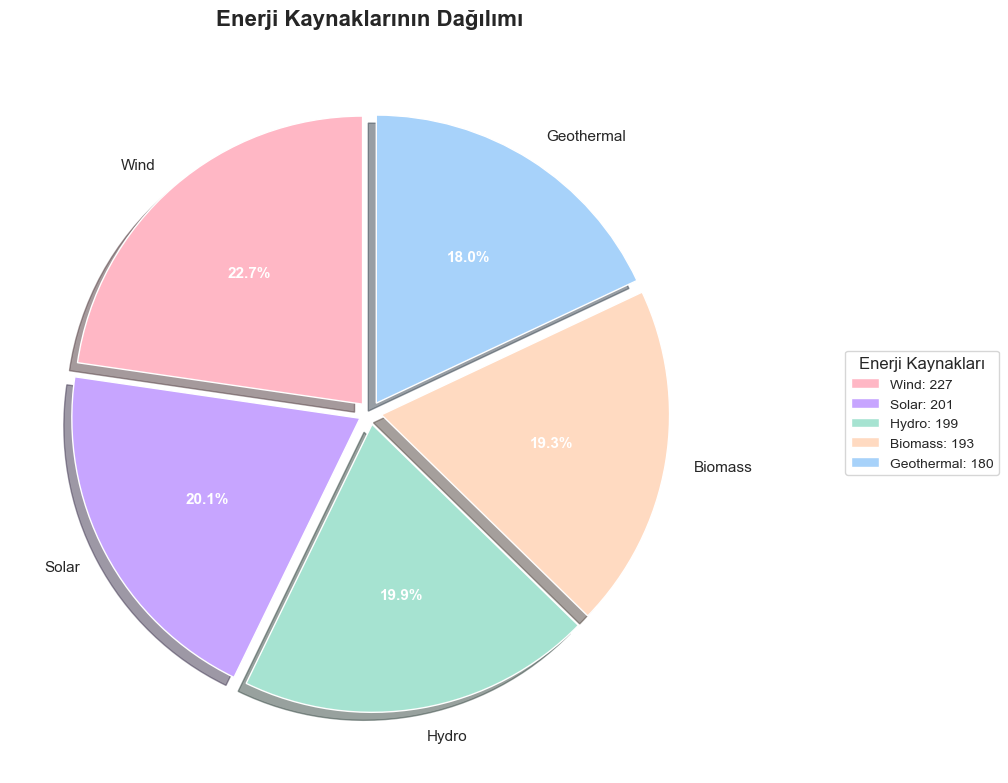

In [23]:
if "Energy_Source" in data.columns:

    source_counts = data["Energy_Source"].value_counts()

    if len(source_counts) >= 2:

        plt.figure(figsize=(10, 8))

        candy_colors = list(CANDY_PASTEL.values())[:len(source_counts)]

        wedges, texts, autotexts = plt.pie(
            source_counts.values,
            labels=source_counts.index,
            autopct='%1.1f%%',
            startangle=90,
            colors=candy_colors,
            explode=[0.04]*len(source_counts),
            shadow=True,
            textprops={'fontsize': 11}
        )

        plt.title(
            "Enerji Kaynaklarının Dağılımı",
            fontsize=16, fontweight='bold', pad=20
        )

        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')

        plt.legend(
    wedges,
    [f"{label}: {value:,}" for label, value in zip(source_counts.index, source_counts.values)],
    title="Enerji Kaynakları",
    bbox_to_anchor=(1.15, 0.5),
    loc="center left",
    fontsize=10
)

        plt.tight_layout()
        plt.savefig("graph2_energy_sources_pie.png", dpi=150, bbox_inches="tight")

        plt.show()

    else:
        print("❌ Pie chart için yeterli kategori yok.")

else:
    print("❌ 'Energy_Source' kolonu bulunamadı.")


sns.set(style="whitegrid")

CANDY_PASTEL = {
    "pink": "#FFB7C5",
    "lavender": "#C7A5FF",
    "mint": "#A6E3D1",
    "peach": "#FFDAC1",
    "sky": "#A7D2FA",
    "lemon": "#FFF4A3"
}

Bu pasta grafiği, veri setindeki gözlemlerin enerji kaynakları arasındaki dağılımını yüzdesel olarak göstermektedir. Kaynaklar nispeten dengeli bir dağılıma sahip. Rüzgar enerjisi %22.7'lik payı ile en sık gözlemlenen kaynak. Bunu yakından takip eden Güneş %20.1, Hidro %19.9 ve Biyokütle %19.3'lük paylarla dengeli bir ağırlık oluşturuyor. En az paya sahip kaynak ise %18.0 ile Jeotermal enerjisi. Bu dağılım, veri setindeki kaynak çeşitliliğinin yüksek olduğunu ve dört ana kaynağın toplam gözlem sayısının büyük bir bölümünü oluşturduğunu göstermektedir.

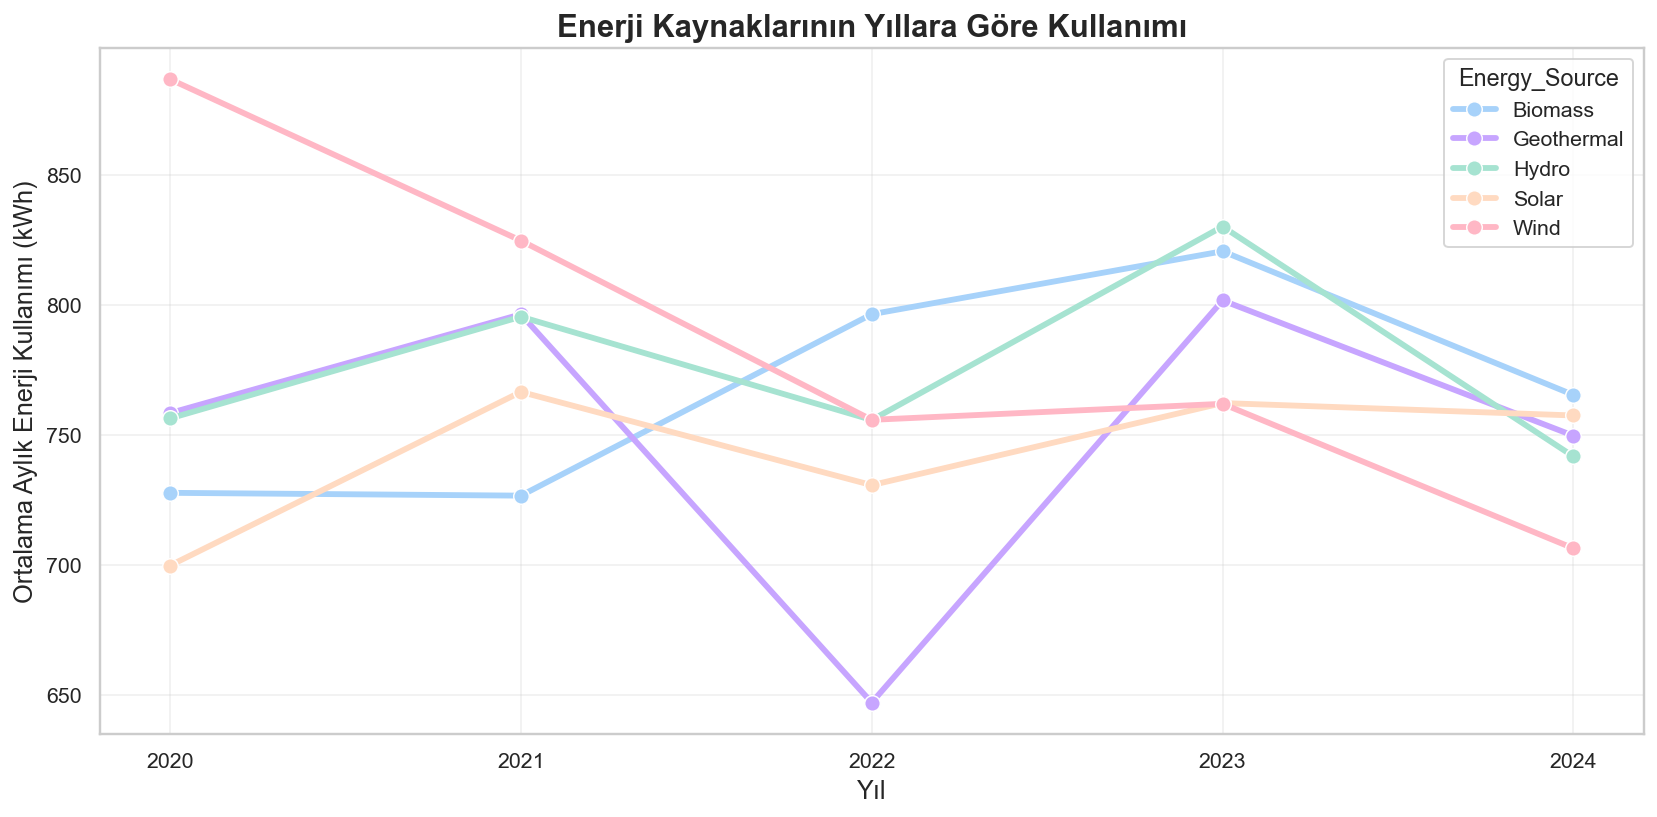

In [27]:
plt.figure(figsize=(12, 6), dpi=140)

# Data
temp = data.groupby(["Year", "Energy_Source"])["Monthly_Usage_kWh"].mean().reset_index()

line_colors = [
    CANDY_PASTEL["sky"],
    CANDY_PASTEL["lavender"],
    CANDY_PASTEL["mint"],
    CANDY_PASTEL["peach"],
    CANDY_PASTEL["pink"],
    CANDY_PASTEL["lemon"]
]

sns.lineplot(
    data=temp,
    x="Year",
    y="Monthly_Usage_kWh",
    hue="Energy_Source",
    palette=line_colors[: temp["Energy_Source"].nunique()],
    linewidth=3,
    marker="o",
    markersize=8
)

ax = plt.gca()
#ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))

plt.title(
    "Enerji Kaynaklarının Yıllara Göre Kullanımı",
    fontsize=16,
    fontweight="bold"
)

plt.xlabel("Yıl", fontsize=13)
plt.ylabel("Ortalama Aylık Enerji Kullanımı (kWh)", fontsize=13)

plt.grid(alpha=0.25, linewidth=1)
plt.tight_layout()

yearly_usage= data.groupby("Year")["Monthly_Usage_kWh"].mean()
years = yearly_usage.index.astype(int)
plt.xticks(years)

plt.show()


Bu grafik bize, 2020-2024 yılları arasında yenilenebilir enerji kaynaklarının aylık ortalama kullanımı trendlerini gösteriyor.

Liderlik zamanla değişmiş: Rüzgar 2020'de en yüksek tedarikçi iken, 2023'te Hidro ve Biyokütle kaynakları zirveye çıkmış.

Güneş enerjisi istikrarlı bir büyüme profili sunarken, Jeotermal enerji 2022'deki keskin düşüşle en büyük dalgalanmayı göstermiş.

Sonuç olarak, enerji kaynakları arasında belirgin trend farklılıkları görülmektedir. Bazı kaynaklar istikrarlı büyürken, bazılarında önemli dalgalanmalar yaşanmıştır.

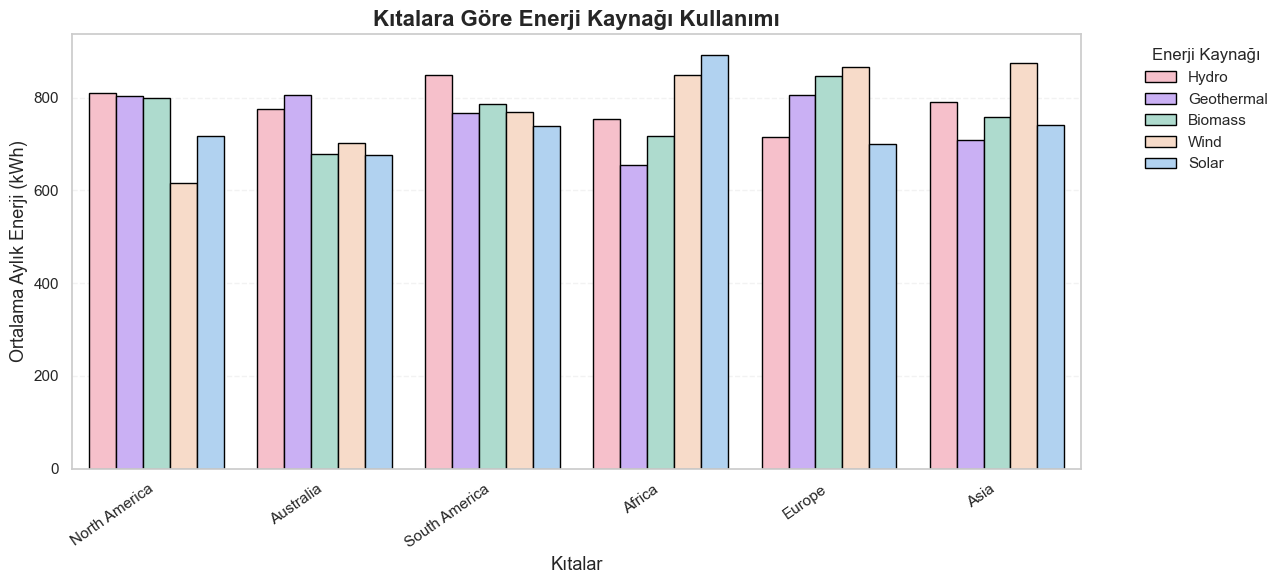

In [28]:
plt.figure(figsize=(13, 6))

unique_sources = data["Energy_Source"].nunique()
palette = list(CANDY_PASTEL.values())[:unique_sources]

sns.barplot(
    data=data,
    x="Region",
    y="Monthly_Usage_kWh",
    hue="Energy_Source",
    estimator="mean",
    errorbar=None,
    palette=palette,
    edgecolor="black",
    linewidth=1
)

plt.title("Kıtalara Göre Enerji Kaynağı Kullanımı", fontsize=16, fontweight="bold")
plt.xlabel("Kıtalar", fontsize=13)
plt.ylabel("Ortalama Aylık Enerji (kWh)", fontsize=13)

plt.xticks(rotation=35, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.25)

plt.legend(
    title="Enerji Kaynağı",
    fontsize=11,
    title_fontsize=12,
    frameon=False,
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
)

plt.tight_layout()
plt.show()


Bu grafik, farklı bölgelerin hangi enerji kaynaklarını daha çok kullandığını göstermektedir. İlginç bir şekilde, her bölge kendi coğrafi avantajına göre hareket etmiş gibi görünüyor.

Asya ve Avrupa rüzgar enerjisinde önde giderken, Afrika güneş enerjisinde lider. Bunun nedeni Afrika'da güneş bol ve Güney Amerika ise hidroelektrikte birinci - muhtemelen nehirleri ve su kaynakları fazla olduğu için.

Jeotermal enerji ise her yerde en az kullanılan kaynak. Bu da bize jeotermal enerjinin henüz yaygınlaşmadığını göstermektedir.

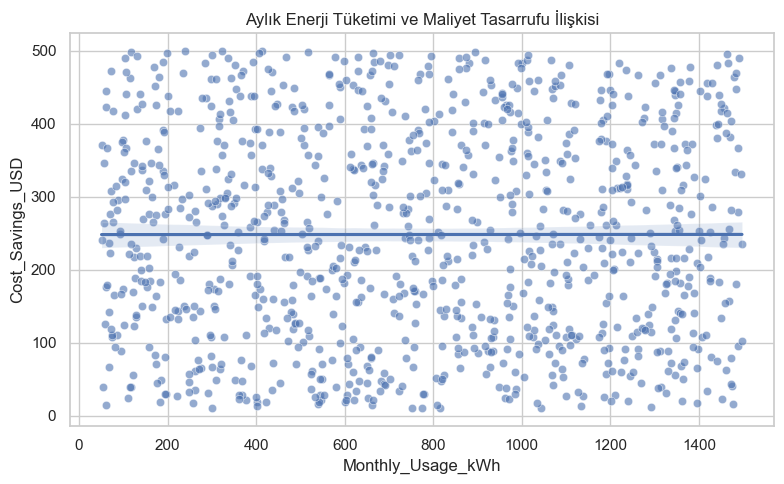

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=data,
    x="Monthly_Usage_kWh",
    y="Cost_Savings_USD",
    alpha=0.6
)

sns.regplot(
    data=data,
    x="Monthly_Usage_kWh",
    y="Cost_Savings_USD",
    scatter=False
)

plt.title("Aylık Enerji Tüketimi ve Maliyet Tasarrufu İlişkisi")
plt.tight_layout()
plt.show()


Bu grafikte, aylık enerji tüketimi ile maliyet tasarrufu arasında zayıf pozitif bir ilişki gözlemlenmektedir. 
Ancak aynı tüketim seviyelerinde maliyet tasarrufunun geniş bir aralıkta dağılması, bu değişkenin tasarrufu tek başına açıklamada yetersiz olduğunu göstermektedir.

In [31]:
data['Per_Capita_Usage'] = data['Monthly_Usage_kWh'] / data['Household_Size']  
# Kişi başı enerji kullanımı eklendi.

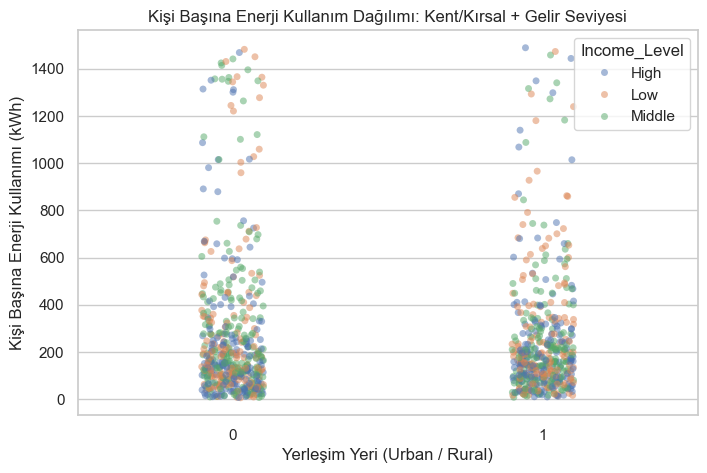

In [33]:
plt.figure(figsize=(8,5))
sns.stripplot(
    x='Urban_Rural',
    y='Per_Capita_Usage',
    hue='Income_Level',
    data=data,
    jitter=True,
    alpha=0.5
)
plt.xlabel("Yerleşim Yeri (Urban / Rural)")
plt.ylabel("Kişi Başına Enerji Kullanımı (kWh)")
plt.title("Kişi Başına Enerji Kullanım Dağılımı: Kent/Kırsal + Gelir Seviyesi")
plt.show()

1-Şehirde olmak veya kırsalda olmak tek başına tüketimin aşırı artmasına veya azalmasına neden olmamaktadır.

2-Gelir seviyesi arttıkça tüketim çok belirgin şekilde artmamaktadır.

3-Üç gelir grubu da neredeyse aynı aralıkta dağılmış durumdadır.

4-Şehirde yaşayan yüksek gelirli haneler, kırsaldakilere göre biraz daha fazla tüketme eğiliminde olabilir.

/var/folders/97/v3gfb8px3wz3hx8bn0w7fn8h0000gn/T/ipykernel_2106/251989948.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Income_Level", y="Cost_Savings_USD", data=data, palette="viridis")


<function matplotlib.pyplot.show(close=None, block=None)>

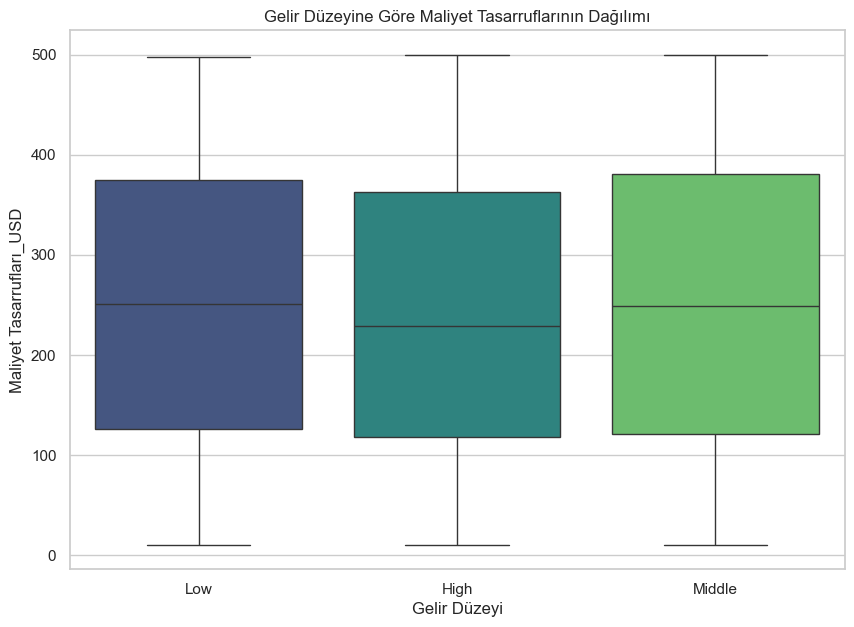

In [26]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Income_Level", y="Cost_Savings_USD", data=data, palette="viridis")
plt.title("Gelir Düzeyine Göre Maliyet Tasarruflarının Dağılımı")
plt.xlabel("Gelir Düzeyi")
plt.ylabel("Maliyet Tasarrufları_USD")
plt.show

Bu grafikte hanelerin gelir kaynakları seviyesini yaptıkları tasarrufa göre karşılaştırılmaktadır.
Grafiğe bakıldığında orta veya düşük gelir seviyesine sahip hanelerin daha çok maliyet tasarrufu yaptığını görülemektedir. 
Aralarında çok fark olmamasından dolayı gelir seviyesinin tasarrufa katkıları neredeyse aynı diyebiliriz.

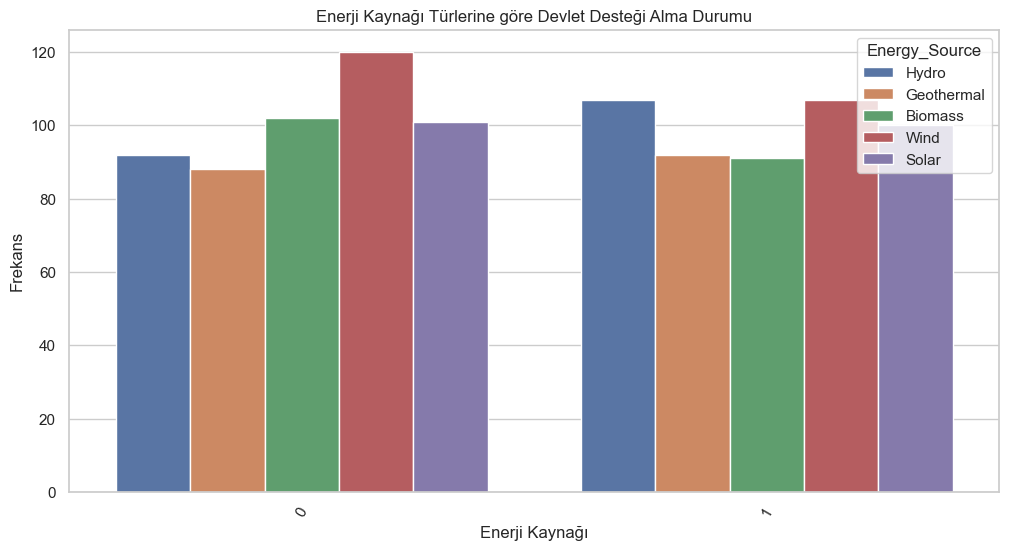

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Subsidy_Received', hue='Energy_Source')
plt.title("Enerji Kaynağı Türlerine göre Devlet Desteği Alma Durumu")
plt.xlabel("Enerji Kaynağı")
plt.ylabel("Frekans")
plt.xticks(rotation=60)
plt.show()

/var/folders/97/v3gfb8px3wz3hx8bn0w7fn8h0000gn/T/ipykernel_2106/2513023715.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x= energy_efficiency.index, y = energy_efficiency.values, palette="ocean")


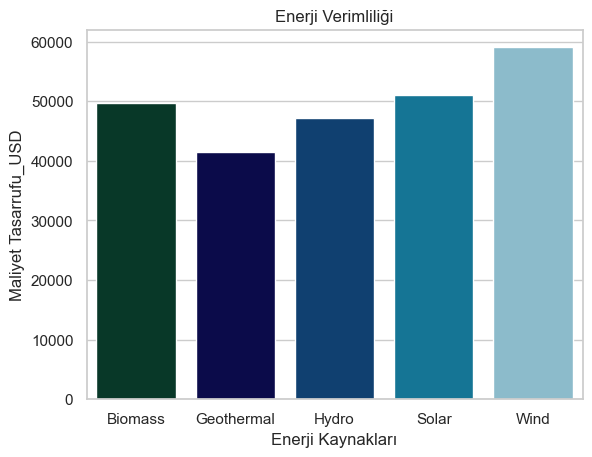

In [27]:
energy_efficiency = data.groupby("Energy_Source")['Cost_Savings_USD'].sum()
sns.barplot(x= energy_efficiency.index, y = energy_efficiency.values, palette="ocean")
plt.title("Enerji Verimliliği")
plt.xlabel("Enerji Kaynakları")
plt.ylabel("Maliyet Tasarrufu_USD")
plt.show()

Bu grafik farklı enerji kaynaklarının sağladığı maliyet tasarruflarını karşılaştırmalı bir şekilde göstermektedir.

En çok maliyet tasarrufu yapabilecek enerji kaynağının rüzgar olduğunu görülmektedir.

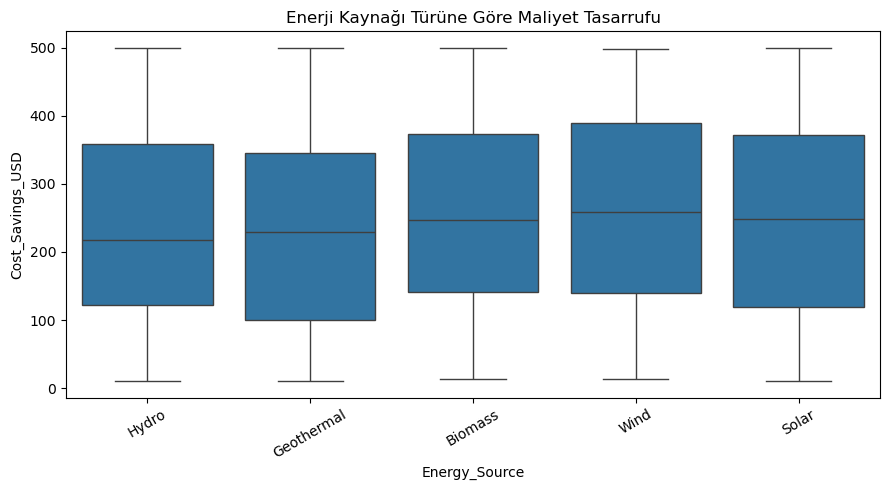

In [5]:
plt.figure(figsize=(9,5))
sns.boxplot(
    data=data,
    x="Energy_Source",
    y="Cost_Savings_USD"
)

plt.title("Enerji Kaynağı Türüne Göre Maliyet Tasarrufu")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Bu grafikte; tüm enerji kaynaklarında geniş bir dağılım gözlenmektedir.
Bu durum maliyet tasarrufunun yalnızca enerji türüne değil,
hane özellikleri, tüketim miktarı ve bölgesel faktörlere de bağlı olduğunu göstermektedir.
Üst sınırların birbirine yakın olması, farklı enerji kaynaklarının maksimum potansiyel tasarruf açısından 
benzer seviyelere ulaşabildiğini gösterir.

MAKİNE ÖĞRENMESİ

Teşvik Alma Durumu 

Hedef değişken: Subsidy_received (Yes,No)

Amaç 

Hanenin özelliklerine bakarak devlet teşviği alıp almadığını sınıflandırmak

Teşvik genelde tüketim düzeyi, hane geliri, enerji türü ile ilişkili olduğundan veri bu problem için uygundur.

Bu model bir hanenin devlet teşviği alıp almadığını tahmin eder ve hangi özelliklerin daha güçlü etki yaptığını göstermektedir.

Fitting 3 folds for each of 108 candidates, totalling 324 fits

En iyi parametreler:
{'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}

Accuracy: 0.49

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.52      0.52       108
           1       0.45      0.46      0.45        92

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.49      0.49      0.49       200


Confusion Matrix:
 [[56 52]
 [50 42]]


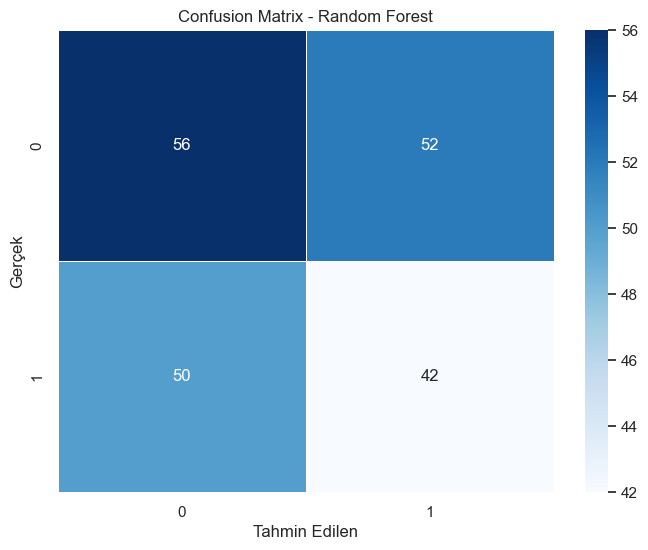

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, 
    classification_report, 
    confusion_matrix, 
    roc_curve, 
    auc
)
from sklearn.ensemble import RandomForestClassifier


# 1. VERİ HAZIRLIĞI


y = data["Subsidy_Received"]       # hedef
X = data.drop(columns=["Subsidy_Received"])

categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
        ("num", "passthrough", numeric_cols),
    ]
)

# 2. GRIDSEARCHCV — HİPERPARAMETRE OPTİMİZASYONU

rf = RandomForestClassifier(random_state=42)

pipeline = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("rf", rf)
    ]
)


param_grid = {
    "rf__n_estimators": [200, 300, 400],
    "rf__max_depth": [None, 10, 20, 30],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4]
}

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


grid = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=1
)


grid.fit(X_train, y_train)

print("\nEn iyi parametreler:")
print(grid.best_params_)

best_model = grid.best_estimator_


# 3. DEĞERLENDİRME 

y_pred = best_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, cmap="Blues")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Random Forest")
plt.show()

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Accuracy: 0.54

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.56      0.55       101
           1       0.54      0.52      0.53        99

    accuracy                           0.54       200
   macro avg       0.54      0.54      0.54       200
weighted avg       0.54      0.54      0.54       200


Confusion Matrix:
 [[57 44]
 [48 51]]


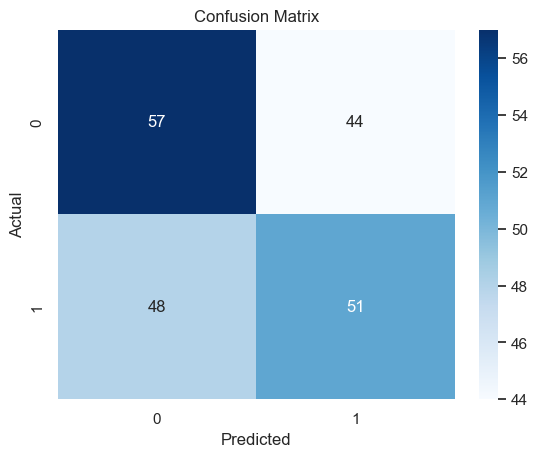

In [63]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier

#Hedef değişken sayısallaştırıldı.

y_raw = data["Subsidy_Received"].astype(str)
le = LabelEncoder()
y = le.fit_transform(y_raw)


X = data.drop(columns=["Subsidy_Received"])

# Sabit kolonlar varsa sil
constant_cols = [c for c in X.columns if X[c].nunique() <= 1]
X = X.drop(columns=constant_cols)

# Sayısal fakat kategori gibi görünen kolonları düzelt
for col in X.columns:
    if X[col].dtype in ["int64", "float64"] and X[col].nunique() < 20:
        X[col] = X[col].astype(str)

# Kategorik kolonları string yap
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()
for col in categorical_features:
    X[col] = X[col].astype(str)

# Numerik kolonlar
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()


# 3) Preprocessing

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"
)


X_processed = preprocessor.fit_transform(X)


# 4) Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)


# 5) XGBoost Model + GridSearchCV

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
}

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)


# 6) Değerlendirme

best = grid.best_estimator_
y_pred = best.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Maliyet Tasarrufu Tahmini

Hedef değişken: Cost_saving_USD - Hanelerin yenilenebilir enerji kullanımı sonucu elde ettiği maliyet tasarrufu

Amaç: Veri setindeki değişenleri kullanarak maliyet tasarrufunu tahmin eden bir regresyon modeli geliştirmek

In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestRegressor

Fitting 3 folds for each of 324 candidates, totalling 972 fits
En iyi parametreler:
{'model__max_depth': 20, 'model__max_features': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
MSE: 71.97039136566382
RMSE: 8.483536489322352
R2 Skoru: 0.9963657485420393


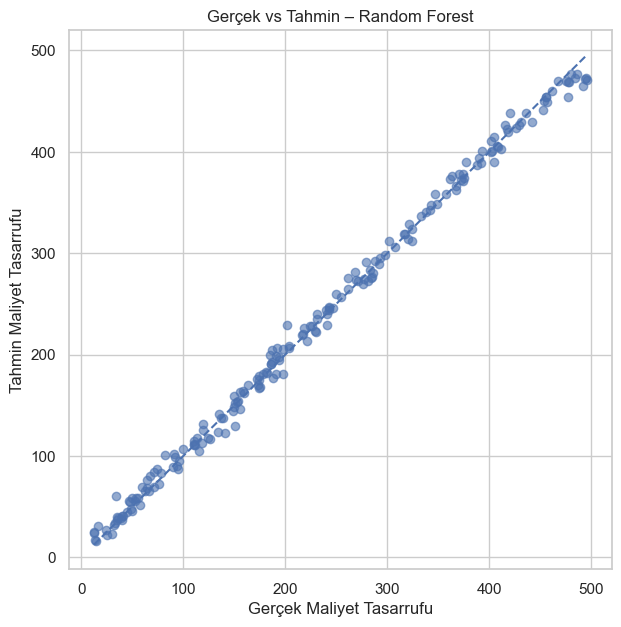

In [67]:
y = data["Cost_Savings_USD"]        # Maliyet tasarrufu (regresyon hedefi)
X = data.drop("Cost_Savings_USD", axis=1)

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ]
)

rf = RandomForestRegressor(random_state=42)

pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("model", rf)
])

param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [5, 10, 20, None],
    "model__min_samples_split": [2, 5, 10],
    "model__min_samples_leaf": [1, 2, 4],
    "model__max_features": ["sqrt", "log2", None]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=1
)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

grid.fit(X_train, y_train)

print("En iyi parametreler:")
print(grid.best_params_)

best_rf = grid.best_estimator_

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Skoru:", r2)

plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Gerçek Maliyet Tasarrufu")
plt.ylabel("Tahmini Maliyet Tasarrufu")
plt.title("Gerçek vs Tahmin – Random Forest")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()

Random Forest regresyon modeli, maliyet tasarrufunu tahmin etmede yüksek doğruluk göstermiştir. Gerçek ve tahmin edilen değerler arasındaki güçlü doğrusal ilişki, modelin tüm değer aralığında dengeli ve istikrarlı tahminler ürettiğini ortaya koymaktadır. Model, özellikle yüksek maliyet tasarrufu seviyelerinde hata artışı göstermemiştir.

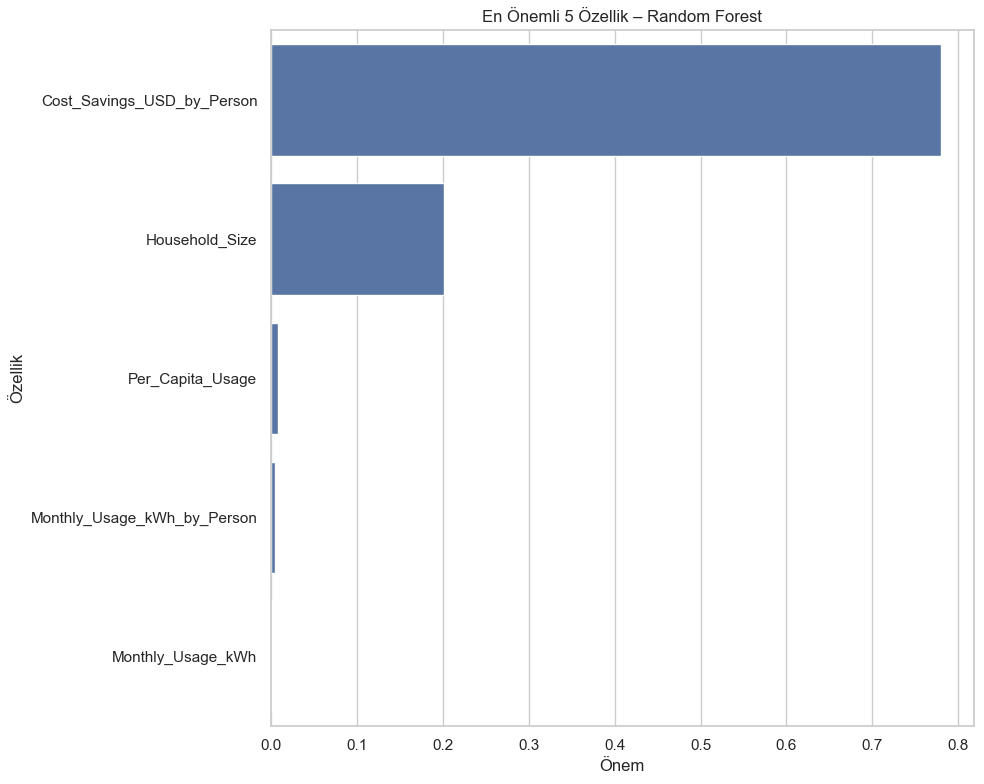

In [68]:
rf_model = best_rf.named_steps["model"]

# Pipeline sonrası OneHotEncoder genişlemiş özellik isimlerini üret
feature_names = (
    numeric_features
    + best_rf.named_steps["prep"]
        .transformers_[1][1]
        .get_feature_names_out(categorical_features).tolist()
)

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,8))
sns.barplot(
    x=importances[indices][:5],
    y=[feature_names[i] for i in indices[:5]]
)
plt.title("En Önemli 5 Özellik – Random Forest")
plt.xlabel("Önem")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()


In [69]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

In [70]:
y = data["Cost_Savings_USD"]
X = data.drop("Cost_Savings_USD", axis=1)

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    eval_metric="rmse"
)

pipeline = Pipeline(steps=[
    ("prep", preprocess),
    ("model", xgb_model)
])

param_grid = {
    "model__n_estimators": [100, 200, 300],
    "model__max_depth": [3, 5, 7, 10],
    "model__learning_rate": [0.01, 0.05, 0.1],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring="neg_mean_squared_error",
    verbose=1
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

grid.fit(X_train, y_train)

print("En iyi parametreler:")
print(grid.best_params_)

best_xgb = grid.best_estimator_

y_pred = best_xgb.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Skoru:", r2)



Fitting 3 folds for each of 324 candidates, totalling 972 fits
En iyi parametreler:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.05, 'model__max_depth': 5, 'model__n_estimators': 300, 'model__subsample': 1.0}
MSE: 71.97039136566382
RMSE: 7.391971895078516
R2 Skoru: 0.9972408092654607


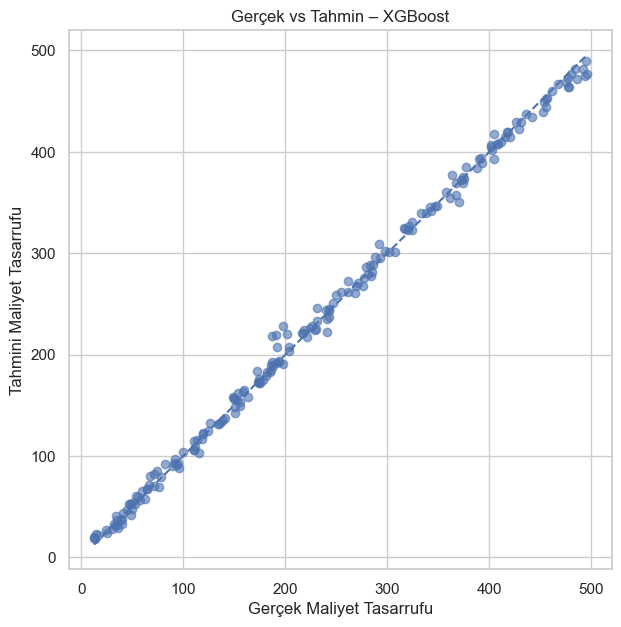

In [71]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Gerçek Maliyet Tasarrufu")
plt.ylabel("Tahmini Maliyet Tasarrufu")
plt.title("Gerçek vs Tahmin – XGBoost")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.show()

XGBoost regresyon modeli, maliyet tasarrufunu tahmin etmede en yüksek performansı göstermiştir. Gerçek ve tahmin edilen değerler arasındaki güçlü doğrusal ilişki, modelin tüm değer aralığında yüksek doğruluk ve istikrar sağladığını ortaya koymaktadır. Bu nedenle XGBoost modeli, nihai tahmin modeli olarak seçilmiştir.

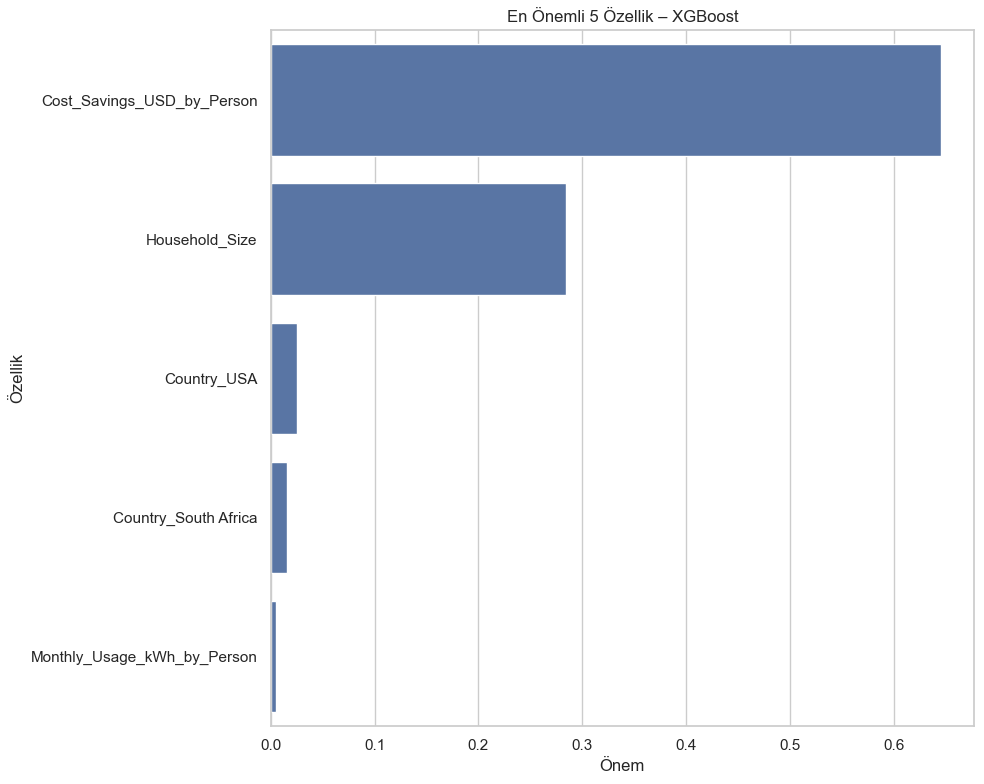

In [72]:
xgb_final = best_xgb.named_steps["model"]

feature_names = (
    numeric_features
    + best_xgb.named_steps["prep"]
        .transformers_[1][1]
        .get_feature_names_out(categorical_features).tolist()
)

importances = xgb_final.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,8))
sns.barplot(
    x=importances[indices][:5],
    y=[feature_names[i] for i in indices[:5]]
)
plt.title("En Önemli 5 Özellik – XGBoost")
plt.xlabel("Önem")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [74]:
y = data["Cost_Savings_USD"]
X = data.drop(columns=["Cost_Savings_USD"])

numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ],
    remainder="drop"
)

base_estimator = DecisionTreeRegressor(random_state=42)

ada = AdaBoostRegressor(
    estimator=base_estimator,
    random_state=42
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", ada)
])

param_grid = {
    "model__n_estimators": [50, 100, 200],
    "model__learning_rate": [0.01, 0.05, 0.1, 1.0],
    "model__estimator__max_depth": [2, 3, 5],
    "model__estimator__min_samples_split": [2, 5, 10]
}

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

grid = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

best_model = grid.best_estimator_

y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²  : {r2:.3f}")


Numeric: ['Monthly_Usage_kWh', 'Year', 'Household_Size', 'Urban_Rural', 'Adoption_Year', 'Subsidy_Received', 'Monthly_Usage_kWh_by_Person', 'Cost_Savings_USD_by_Person', 'Per_Capita_Usage']
Categorical: ['Region', 'Country', 'Energy_Source', 'Income_Level']
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'model__estimator__max_depth': 5, 'model__estimator__min_samples_split': 5, 'model__learning_rate': 1.0, 'model__n_estimators': 200}
MAE : 17.73
RMSE: 20.48
R²  : 0.979


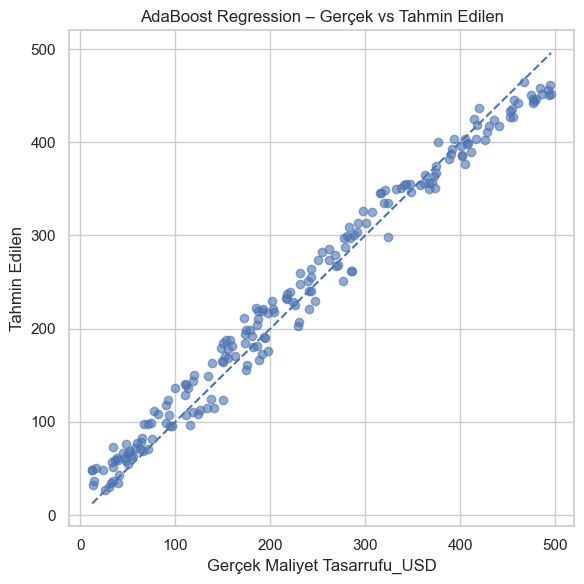

In [75]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Gerçek Maliyet Tasarrufu_USD")
plt.ylabel("Tahmin Edilen")
plt.title("AdaBoost Regression – Gerçek vs Tahmin Edilen")
plt.tight_layout()
plt.show()

AdaBoost regresyon modeli, maliyet tasarrufunu tahmin etmede yüksek doğruluk sağlamıştır. Test setinde elde edilen R² = 0.979 değeri, modelin maliyet tasarrufundaki varyansın yaklaşık %98’ini açıkladığını göstermektedir. Gerçek ve tahmin edilen değerler arasındaki güçlü doğrusal ilişki, modelin tüm değer aralığında istikrarlı ve güvenilir tahminler ürettiğini ortaya koymaktadır.

48 48
                       Feature  Importance
7   Cost_Savings_USD_by_Person    0.608313
2               Household_Size    0.367245
8             Per_Capita_Usage    0.008943
6  Monthly_Usage_kWh_by_Person    0.004990
0            Monthly_Usage_kWh    0.002747


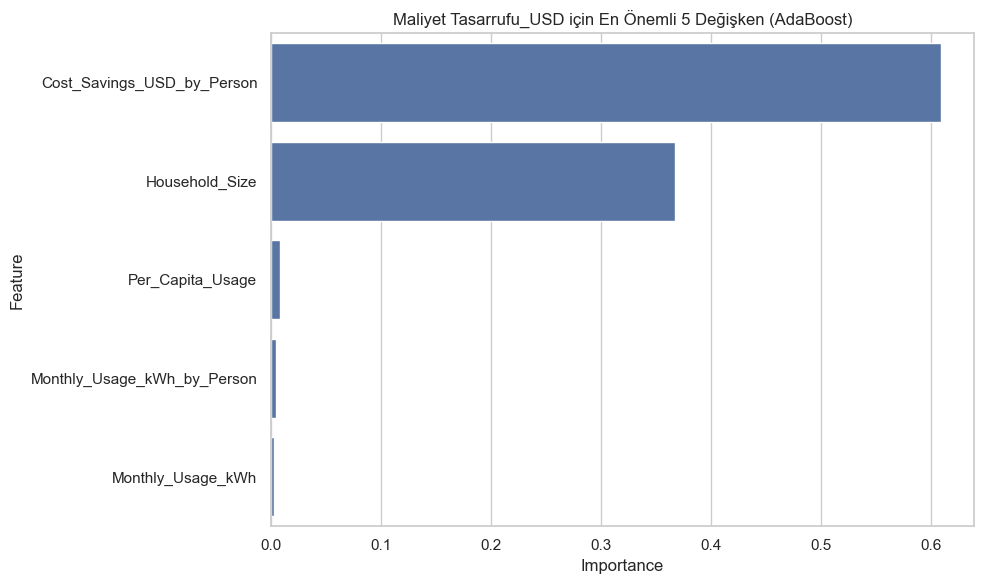

In [76]:
best_model = grid.best_estimator_
num_features = numeric_features
ohe = best_model.named_steps["preprocess"].named_transformers_["cat"]
cat_features = ohe.get_feature_names_out(categorical_features).tolist()
feature_names = num_features + cat_features
importances = best_model.named_steps["model"].feature_importances_
print(len(feature_names), len(importances))
import pandas as pd

feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})

feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)

top10 = feature_importance_df.head(5)
print(top10)


plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=top10
)
plt.title("Maliyet Tasarrufu_USD için En Önemli 5 Değişken (AdaBoost)")
plt.tight_layout()
plt.show()
